# IMDB-MOVIE DATASET ANALYSIS


In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
df = pd.read_csv(r"C:\Users\ashu9\Downloads\IMDB-Movie-Data.csv")

### 1- Top 10 rows of datasets

In [ ]:
df.head(10)

### 2- Below 10 rows from datasets

In [ ]:
df.tail(10)

### 3- no. of row and columns of data

In [11]:
print("Number of rows in datasets",df.shape[0])
print("Number of columns in datasets",df.shape[1])

Number of rows in datasets 1000
Number of columns in datasets 12


### 4- Getting Information about the datasets

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Rank                1000 non-null   int64  
 1   Title               1000 non-null   object 
 2   Genre               1000 non-null   object 
 3   Description         1000 non-null   object 
 4   Director            1000 non-null   object 
 5   Actors              1000 non-null   object 
 6   Year                1000 non-null   int64  
 7   Runtime (Minutes)   1000 non-null   int64  
 8   Rating              1000 non-null   float64
 9   Votes               1000 non-null   int64  
 10  Revenue (Millions)  872 non-null    float64
 11  Metascore           936 non-null    float64
dtypes: float64(3), int64(4), object(5)
memory usage: 93.9+ KB


### 5- Check the Null values in the Datasets

In [15]:
df.isnull().sum()

Rank                    0
Title                   0
Genre                   0
Description             0
Director                0
Actors                  0
Year                    0
Runtime (Minutes)       0
Rating                  0
Votes                   0
Revenue (Millions)    128
Metascore              64
dtype: int64

<Axes: >

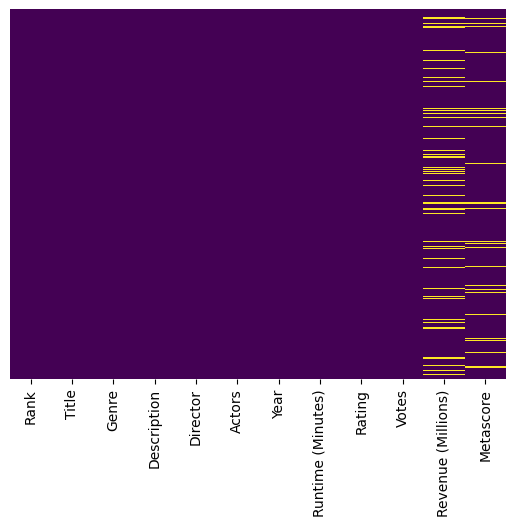

In [16]:
sns.heatmap(df.isnull(),cbar=False,yticklabels=False,cmap='viridis')

### 6- Drop all the missing Values

In [ ]:
df.dropna()

### 7- Drop the Dupliacte row in datases

In [ ]:
df.duplicated().sum()
df.drop_duplicates()

### 8- Get overall statics of the datasets

In [26]:
df.describe()
#df.describe(include='all')

,Rank,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
count,1000.000000,1000.000000,1000.000000,1000.000000,1.000000e+03,872.000000,936.000000
mean,500.500000,2012.783000,113.172000,6.723200,1.698083e+05,82.956376,58.985043
std,288.819436,3.205962,18.810908,0.945429,1.887626e+05,103.253540,17.194757
min,1.000000,2006.000000,66.000000,1.900000,6.100000e+01,0.000000,11.000000
25%,250.750000,2010.000000,100.000000,6.200000,3.630900e+04,13.270000,47.000000
50%,500.500000,2014.000000,111.000000,6.800000,1.107990e+05,47.985000,59.500000
75%,750.250000,2016.000000,123.000000,7.400000,2.399098e+05,113.715000,72.000000
max,1000.000000,2016.000000,191.000000,9.000000,1.791916e+06,936.630000,100.000000


### 9- Display Title pf the movie Having runtime >= 180 minutes

In [31]:
df.columns
df[df['Runtime (Minutes)'] >= 180]['Title']

82     The Wolf of Wall Street
88           The Hateful Eight
311             La vie d'Adèle
828                 Grindhouse
965              Inland Empire
Name: Title, dtype: object

In [32]:
df.columns

Index(['Rank', 'Title', 'Genre', 'Description', 'Director', 'Actors', 'Year',
       'Runtime (Minutes)', 'Rating', 'Votes', 'Revenue (Millions)',
       'Metascore'],
      dtype='object')

### 10- In which year there was the highest average voting

In [44]:
df.groupby("Year")["Votes"].mean().idxmax()

np.int64(2012)

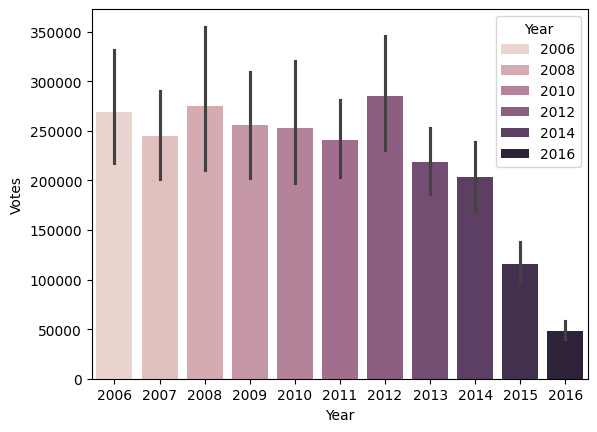

In [56]:
sns.barplot(x="Year",y="Votes",data=df,hue="Year")
plt.show()

##### 11- In which year there was the highest average voting

In [57]:
df.groupby("Year")["Revenue (Millions)"].mean().idxmax()

np.int64(2009)

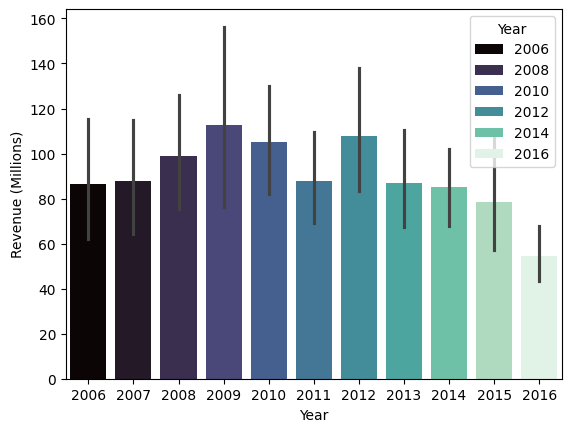

In [68]:
sns.barplot(x="Year",y="Revenue (Millions)",data=df,hue="Year",palette="mako")
plt.show()

### 12- Find the average ratting for each director

In [72]:
df.columns
df.groupby("Director")["Rating"].mean().sort_values(ascending=False)

Director
Nitesh Tiwari                       8.80
Christopher Nolan                   8.68
Olivier Nakache                     8.60
Makoto Shinkai                      8.60
Florian Henckel von Donnersmarck    8.50
                                    ... 
Micheal Bafaro                      3.50
Jonathan Holbrook                   3.20
Shawn Burkett                       2.70
James Wong                          2.70
Jason Friedberg                     1.90
Name: Rating, Length: 644, dtype: float64

### 13- Top 10 Lenghty movies Titles and runtime

In [81]:
df.columns
TOP10=df.nlargest(10,"Runtime (Minutes)")[["Title","Runtime (Minutes)"]].set_index("Title")
TOP10

,Runtime (Minutes)
Title,
Grindhouse,191
The Hateful Eight,187
The Wolf of Wall Street,180
La vie d'Adèle,180
Inland Empire,180
Cloud Atlas,172
3 Idiots,170
Interstellar,169
Pirates of the Caribbean: At World's End,169


<Axes: xlabel='Runtime (Minutes)', ylabel='Title'>

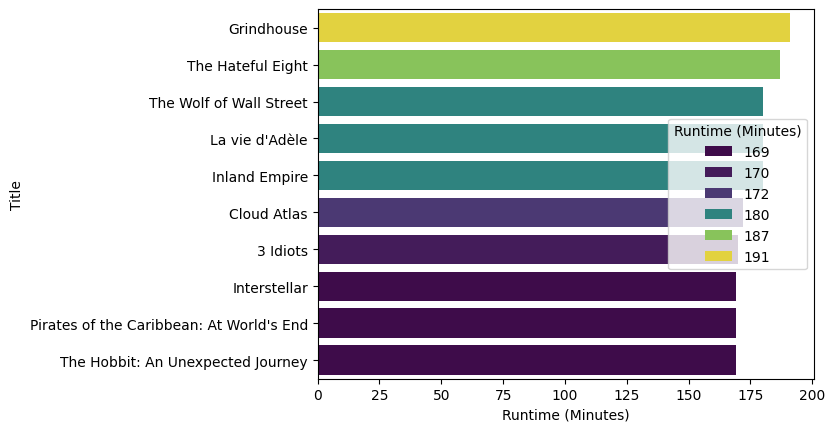

In [90]:
sns.barplot(x="Runtime (Minutes)",y=TOP10.index,data=TOP10,hue="Runtime (Minutes)",palette="viridis")

### 14- Display Number of Movies Per Year

In [98]:
df.columns
df["Year"].value_counts()

Year
2016    297
2015    127
2014     98
2013     91
2012     64
2011     63
2010     60
2007     53
2008     52
2009     51
2006     44
Name: count, dtype: int64

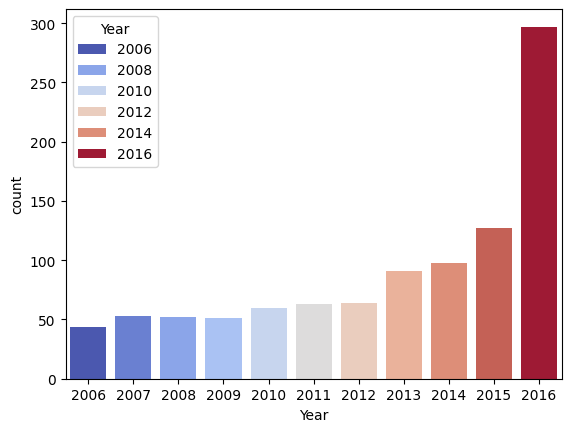

In [104]:
sns.countplot(x=df["Year"],hue=df["Year"],palette="coolwarm")
plt.show()

### 15- Find most popular Movie Title (Highest revenu)

In [110]:
df[df["Revenue (Millions)"] == df["Revenue (Millions)"].max()]["Title"]

50    Star Wars: Episode VII - The Force Awakens
Name: Title, dtype: object

### Display Top 10 Highest Rated Movie and its Directors

In [112]:
TOP10r=df.nlargest(10,"Rating")[["Title","Director","Rating"]].set_index("Title")
TOP10r

,Director,Rating
Title,,
The Dark Knight,Christopher Nolan,9.0
Inception,Christopher Nolan,8.8
Dangal,Nitesh Tiwari,8.8
Interstellar,Christopher Nolan,8.6
Kimi no na wa,Makoto Shinkai,8.6
The Intouchables,Olivier Nakache,8.6
The Prestige,Christopher Nolan,8.5
The Departed,Martin Scorsese,8.5
The Dark Knight Rises,Christopher Nolan,8.5


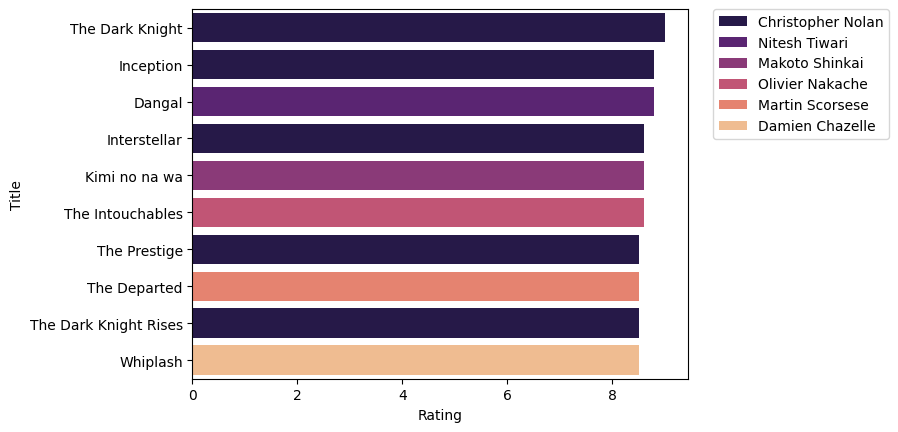

In [116]:
sns.barplot(x="Rating",y=TOP10r.index,data=TOP10r,hue="Director",palette="magma")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

### 17- Display Top 10 highest Revenue Movie totles

In [121]:
retop10df = df.nlargest(10,"Revenue (Millions)")[["Title","Revenue (Millions)"]].set_index("Title")
retop10df

,Revenue (Millions)
Title,
Star Wars: Episode VII - The Force Awakens,936.63
Avatar,760.51
Jurassic World,652.18
The Avengers,623.28
The Dark Knight,533.32
Rogue One,532.17
Finding Dory,486.29
Avengers: Age of Ultron,458.99
The Dark Knight Rises,448.13


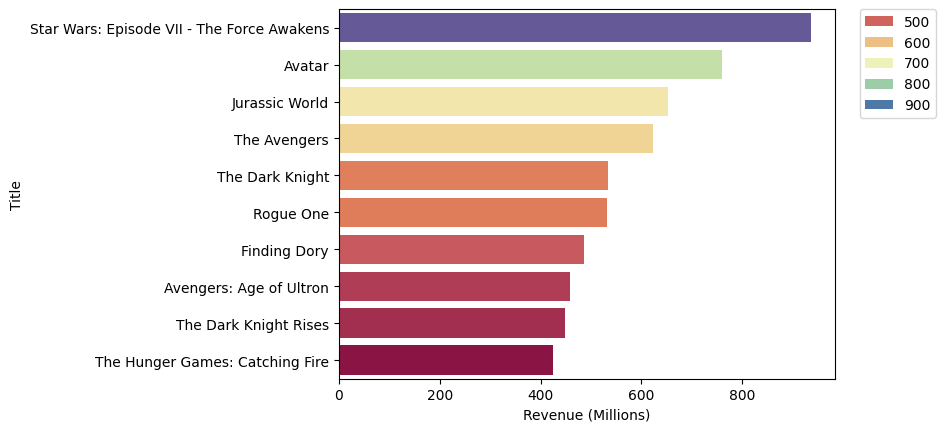

In [ ]:
sns.barplot(x="Revenue (Millions)",y=retop10df.index,data=retop10df,palette="Spectral")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

### Find Average Rating of Movies Year Wise

In [127]:
df.groupby('Year')['Rating'].mean().sort_values(ascending=False)

Year
2007    7.133962
2006    7.125000
2009    6.960784
2012    6.925000
2011    6.838095
2014    6.837755
2010    6.826667
2013    6.812088
2008    6.784615
2015    6.602362
2016    6.436700
Name: Rating, dtype: float64

### 19- Does Rating Affect the revenu

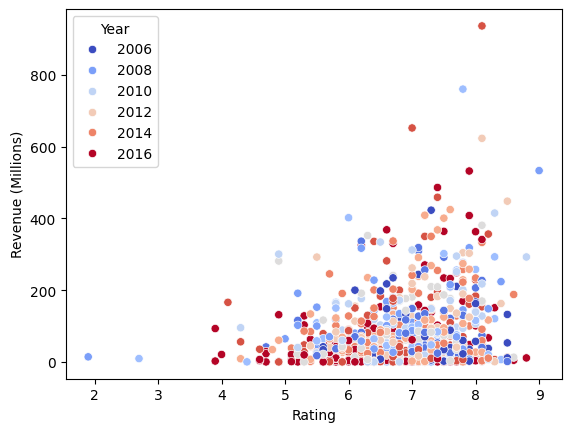

In [129]:
sns.scatterplot(x='Rating',y='Revenue (Millions)',data=df,hue='Year',palette='coolwarm')
plt.show()

#### yes Ratting affected the revenu

### 20-Classify Movies Based on ratings [Excellent,Good,Averege]

In [131]:
def rate_movie(rating):
    if rating >= 8:
        return "Excellent"
    elif rating >= 6:
        return "Good"
    else:
        return "Average"

In [132]:
df["categorize_rating"] = df['Rating'].apply(rate_movie)
df[['Title','Rating','categorize_rating']].head()

,Title,Rating,categorize_rating
0,Guardians of the Galaxy,8.1,Excellent
1,Prometheus,7.0,Good
2,Split,7.3,Good
3,Sing,7.2,Good
4,Suicide Squad,6.2,Good


### 21- Find how much movies are Action movies

In [136]:
df1=df[df['Genre'].str.contains('Action',case=False)]
print("action movies count:",len(df1))

action movies count: 303


### 22- Find Unique Values from Genre

In [139]:
len(df["Genre"].unique())

207